<a href="https://colab.research.google.com/github/Akita20/Linear-Regression/blob/main/Handwritten_Digit_Compression_and_Visualization_using_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### II. Autoencoders (25 minutes)

#### A. Basic concepts

##### 1. Definition of autoencoder
An autoencoder is a type of artificial neural network used for unsupervised learning. The primary goal of an autoencoder is to learn a representation (encoding) of the input data, typically for the purpose of dimensionality reduction or feature learning. Autoencoders consist of two main components: an encoder and a decoder. They are trained to reconstruct their input as accurately as possible, with the constraint that the encoded representation has a lower dimensionality or some other desirable properties.

##### 2. Encoder and decoder components
The encoder is the first part of the autoencoder that receives the input data and transforms it into a lower-dimensional representation (encoding). It consists of one or more layers of neurons, each of which applies a non-linear transformation to the data. The decoder is the second part of the autoencoder, which takes the encoded representation as input and reconstructs the original input data from it. Like the encoder, the decoder consists of one or more layers of neurons that apply non-linear transformations to the data.

#### B. Applications of autoencoders

##### 1. Dimensionality reduction
Autoencoders can be used for dimensionality reduction by forcing the encoded representation to have a lower dimensionality than the input data. The autoencoder learns to retain the most relevant information from the input data in the encoded representation, effectively compressing the data. This can be particularly useful for visualization, data compression, and improving the performance of other machine learning algorithms.

##### 2. Denoising data
Denoising autoencoders are a variant of autoencoders specifically designed for removing noise from input data. They are trained on noisy versions of the input data, with the goal of reconstructing the clean, original data. Denoising autoencoders can be useful for tasks such as image denoising, signal processing, and data preprocessing.

##### 3. Feature learning
Autoencoders can be used for feature learning by capturing meaningful, high-level features from input data in the encoded representation. These learned features can then be used for other machine learning tasks, such as classification or clustering. This can be particularly beneficial when labeled data is scarce, as autoencoders can learn features in an unsupervised manner.


## **"Handwritten Digit Compression and Visualization using Autoencoders"**

**Problem Statement**:
The goal of this project is to develop a deep learning model that can efficiently compress and reconstruct images of handwritten digits from the MNIST dataset. This will be achieved using an autoencoder, which is a type of artificial neural network that learns to encode input data into a lower-dimensional representation and then decode it back to the original form. The model should demonstrate the effectiveness of autoencoders for dimensionality reduction and feature learning. Additionally, we will visualize the compressed representations and reconstructed images to analyze the performance of the autoencoder.









Here's the pseudo-code for the autoencoder example with the MNIST dataset:

> Import required libraries (NumPy, Matplotlib, Keras, and TensorFlow).


> Load the MNIST dataset and split it into training and testing data.

> Normalize the pixel values of the images to be between 0 and 1.

> Flatten the 28x28 images into 784-dimensional vectors.

> Define the autoencoder architecture:

* a. Create an input layer with the same dimensionality as the input data (784).
* b. Create an encoder layer (a dense layer) with 64 neurons and ReLU activation.
* c. Create a decoder layer (another dense layer) with 784 neurons and sigmoid activation.
* d. Connect the input, encoder, and decoder layers to form the autoencoder model.

> Compile the autoencoder model using the Adam optimizer and binary cross-entropy loss function.

> Train the autoencoder model on the training data, using the same data as both input and target, for 50 epochs with a batch size of 256.

> After training, create separate encoder and decoder models.
Use the encoder model to transform the test images into 64-dimensional encoded representations.

> Use the decoder model to reconstruct the test images from their encoded representations.

> Visualize the original test images and their corresponding reconstructed images.

> This pseudo-code outlines the key steps involved in creating, training, and testing an autoencoder model using Keras and TensorFlow.

> The example demonstrates dimensionality reduction and feature learning with an autoencoder applied to the MNIST dataset.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize data to [0, 1] range
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
# Flatten images to vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
# Define autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 64

In [6]:
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [7]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
# Create encoder and decoder models
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Encode and decode test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


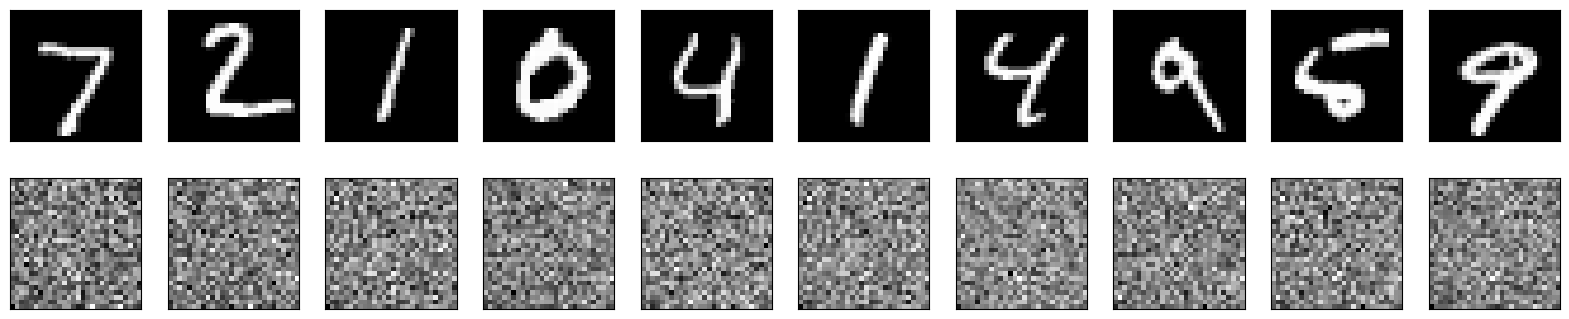

In [10]:
# Visualize the results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
